 # <font size= 1> <font color='FFFFFF'> **Aprendizaje no supervisado**
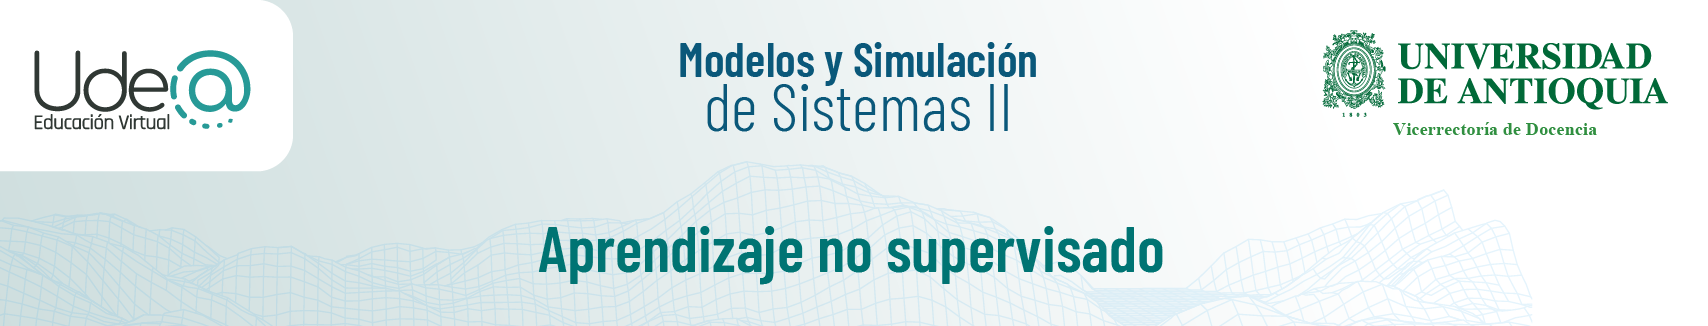

 ## <font size= 1> <font color='FFFFFF'> Clustering

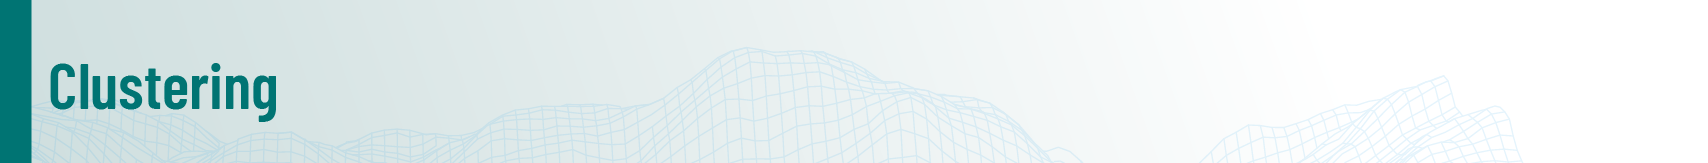

El análisis de cluster es el agrupamiento de individuos en una población para descubrir la estructura en los datos. Clustering es fundamentalmente una **colección de métodos para la exploración de datos**. 

En este caso, las muestras solo cuentan con un vector de características ${\bf x}_i$ que las describe, pero no tienen un valor de salida objetivo. Por esa razón, hacen parte del aprendizaje **no supervisado**; sin embargo, en muchos casos se usan como etapas previas para la aplicación de técncias supervisadas.

Un mismo conjunto de muestras puede tener diferentes formas de agrupación; por esa razón, el método de agrupamiento debe realizarse de manera cuidadosa.

 ## <font size= 1> <font color='FFFFFF'> Métodos jerárquicos y aglomerativos

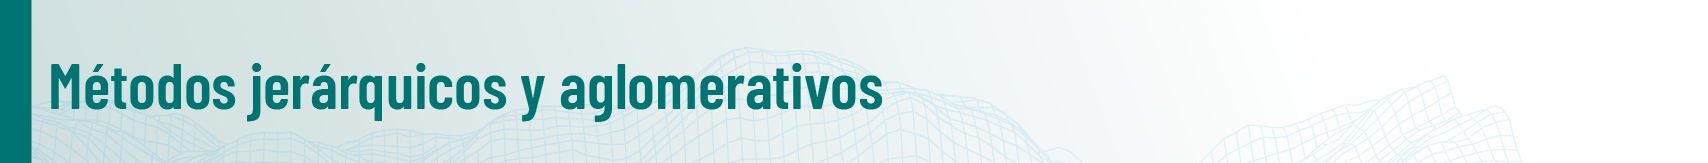

Son los métodos más comunes para resumir la estructura de un conjunto de muestras. Los esquemas de clustering aglomerativos comienzan con el conjunto de datos divido en nodos que representan cada una de las muestras y, paso a paso, van uniendo los nodos más cercanos para formar uno nuevo, hasta que el final solo se obtiene un nodo que representa el conjunto de datos completo.

El algoritmo consiste en lo siguiente: 
https://arxiv.org/pdf/1109.2378v1.pdf

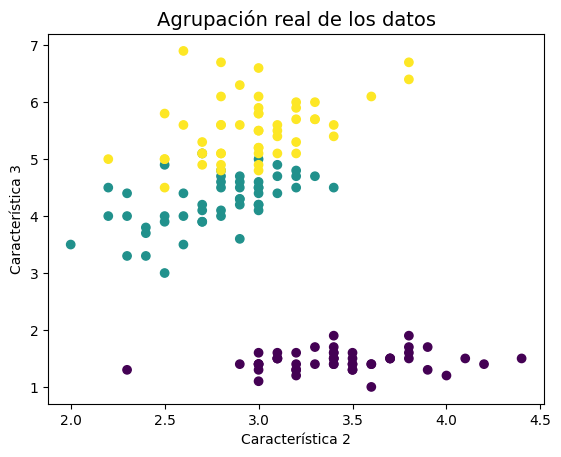

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:150][:,1:3]
y2 = y[:150]
plt.title('Agrupación real de los datos', fontsize=14)
plt.xlabel('Característica 2')
plt.ylabel('Característica 3')
plt.scatter(X2[:,0], X2[:,1], c=y2);

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
distxy = pdist(X, metric='euclidean')

Text(0.5, 0, 'points')

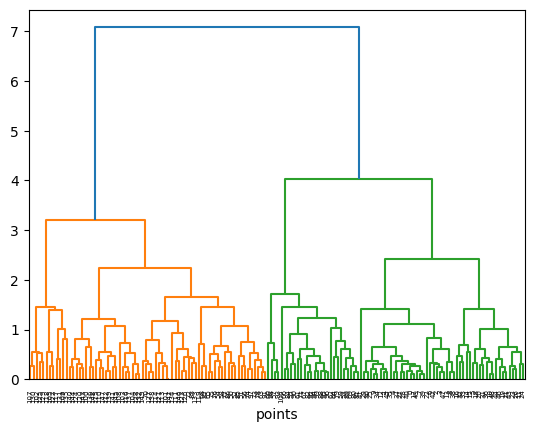

In [ ]:
Z = linkage(distxy, method='complete')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Text(0.5, 0, 'points')

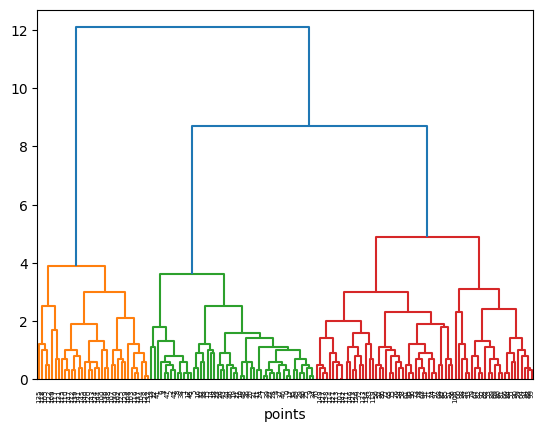

In [ ]:
distxy = pdist(X, metric='minkowski', p=1)
Z = linkage(distxy, method='complete')
plt.figure()
dn = dendrogram(Z)
plt.xlabel('points')

Varios esquemas comparten el mismo principio de funcionamiento pero difieren en la forma en que la medida de similitud entre clústeres es actualizada después de cada paso. Algunas de las estrategias más usadas son:

| Nombre | Actualización de distancia $d(I \cup J,K)$ | Medida de distancia entre clusters $A$ y $B$|
| --- | --- | --- |
| single | $$\min (d(I,K), d(J,K))$$ | $$\min_{a \in A, b \in B} d[A,B]$$ |
| complete | $$\max (d(I,K), d(J,K))$$ | $$\max_{a \in A, b \in B} d[A,B]$$ |
| averages | $$\frac{n_Id(I,K) + n_Jd(J,K)}{n_I + n_J}$$ | $$\frac{1}{|A||B|}\sum_{a\in A}\sum_{b \in B} d[A,B]$$ |
| weighted | $$\frac{d(I,K) + d(J,K)}{2}$$ | $$\frac{1}{|A||B|}\sum_{a\in A}\sum_{b \in B} d[A,B]$$ |
| Ward | $$\sqrt{\frac{(n_I + n_K)d(I,K) + (n_J + n_K)d(J,K) + n_Kd(I,J)}{n_I + n_J + n_K}}$$ | $$\sqrt{\frac{2|A||B|}{|A|+|B|}}||\vec{c}_A - \vec{c}_B||_2$$ |
| centroid | $$\sqrt{\frac{n_Id(I,K) + n_Jd(J,K)}{n_I + n_J} - \frac{n_In_Jd(I,J)}{(n_I + n_J)^2}}$$ | $$||\vec{c}_A - \vec{c}_B||_2$$ |
| median | $$\sqrt{\frac{d(I,K)}{2} + \frac{d(J,K)}{2} - \frac{d(I,J)}{4}}$$ | $$||\vec{w}_A - \vec{w}_B||_2$$ |

Text(0.5, 0, 'points')

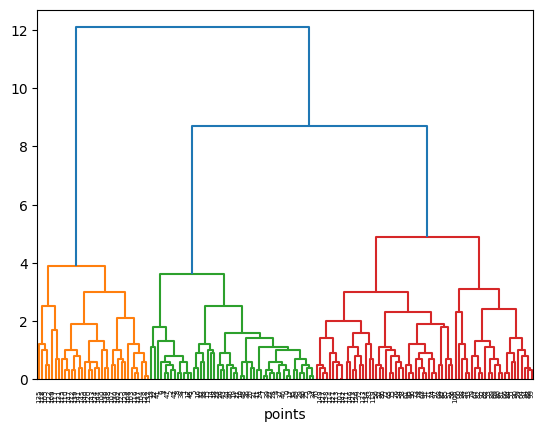

In [ ]:
plt.figure()
dn = dendrogram(Z,color_threshold=0.5*max(Z[:,2]))#defaul 0.7*max(Z[:,2]).
plt.xlabel('points')

 ## <font size= 1> <font color='FFFFFF'> **Métodos de clustering**

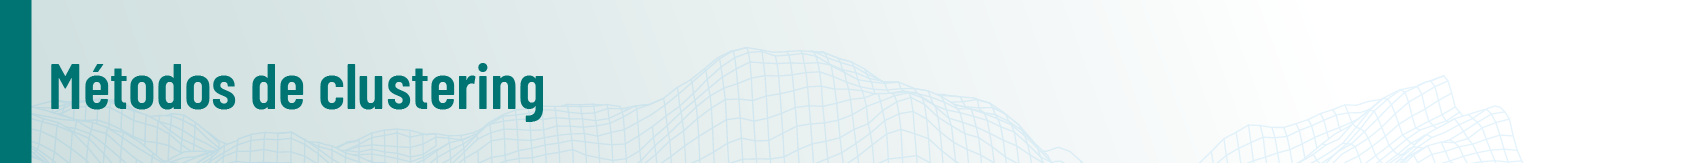




### **K-means**

El algoritmo K-means es, tal vez, el algoritmo más popular de clustering. Este agrupa los datos intentando separar las muestras en $K$ grupos de igual varianza, minimizando un criterio conocido como la <em>inercia</em> o la dispersión intraclúster.

El algoritmo consiste en lo siguiente: 
https://arxiv.org/pdf/1911.07891.pdf


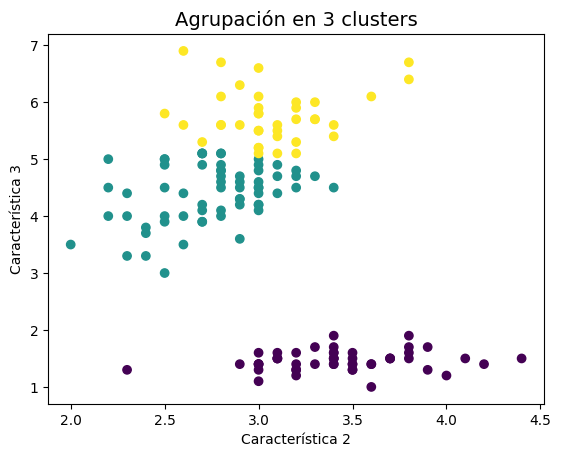

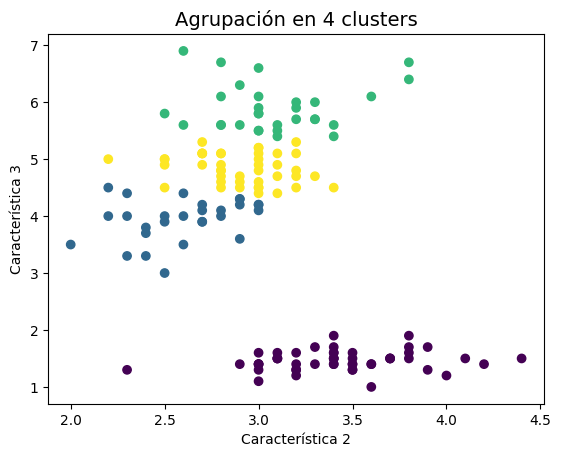

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
for M in range(3,5):
    kmeans = KMeans(init='random', n_clusters=M, n_init=1)
    kmeans.fit(X2)
    Y2 = kmeans.predict(X2)
    plt.figure()
    plt.title('Agrupación en %d clusters' % M, fontsize=14)
    plt.xlabel('Característica 2')
    plt.ylabel('Característica 3')
    plt.scatter(X2[:,0], X2[:,1], c=Y2);

### **Número de clústeres**

Una forma habitual es utilizar una medida conocida como el **porcentaje de varianza explicada**, el cual se define como el cociente entre la varianza entre grupos, sobre el total de la varianza.

Text(0.5, 1.0, 'Elbow for KMeans clustering')

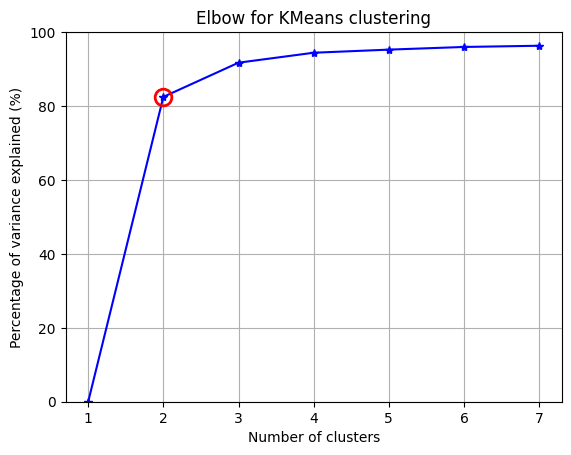

In [ ]:
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import cm

X = X2

##### cluster data into K=1..20 clusters #####
K_MAX = 7
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

##### plots #####
kIdx = 1        # K=10
mrk = 'os^p<dvh8>+x.'

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

### **Coeficiente silhouette**

El valor medio de este coeficiente se usa como un estimador de qué tan bien quedaron agrupadas las muestras. El valor está entre -1 y 1, siendo 1 el valor deseado.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

sillhoute_scores = []
n_cluster_list = np.arange(2,20).astype(int)
    
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

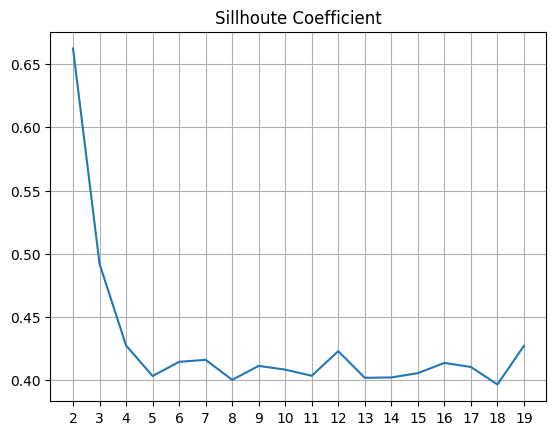

In [ ]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.xticks(range(2,20))
plt.title('Sillhoute Coefficient')
plt.grid()

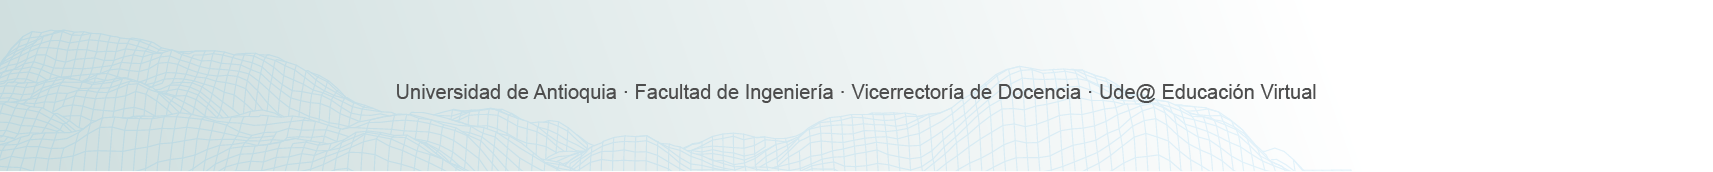